# Dataset

In [3]:
train_test_new <- read.csv("train-test-new.csv")

In [4]:
head(train_test_new)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
56,self-employed,married,university.degree,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
57,management,married,university.degree,no,no,no,cellular,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
36,admin.,married,university.degree,no,yes,no,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
45,management,married,high.school,unknown,no,no,cellular,aug,wed,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
39,admin.,single,university.degree,no,yes,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
33,services,married,high.school,no,no,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no


In [5]:
n <- length(train_test_new[,1])
y.class <- rep(0,n)

In [6]:
for (i in 1:n){
    if (train_test_new[i, 20] == "yes"){
        y.class[i] <- 1
    }
}

In [7]:
train_test_all <- cbind(train_test_new[,1:19], y.class)
head(train_test_all)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y.class
56,self-employed,married,university.degree,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
57,management,married,university.degree,no,no,no,cellular,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
36,admin.,married,university.degree,no,yes,no,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
45,management,married,high.school,unknown,no,no,cellular,aug,wed,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
39,admin.,single,university.degree,no,yes,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
33,services,married,high.school,no,no,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [8]:
train <- train_test_all[1:7500,]
test <- train_test_all[7501:10000,]

In [8]:
head(train)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y.class
56,self-employed,married,university.degree,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
57,management,married,university.degree,no,no,no,cellular,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
36,admin.,married,university.degree,no,yes,no,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
45,management,married,high.school,unknown,no,no,cellular,aug,wed,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
39,admin.,single,university.degree,no,yes,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
33,services,married,high.school,no,no,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


# Logistic Regression

In [32]:
result.LR1 <- glm(y.class~., data=train, family=binomial)

In [33]:
summary(result.LR1)


Call:
glm(formula = y.class ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0651  -0.3934  -0.3185  -0.2565   2.8422  

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -1.528e+02  7.968e+01  -1.917 0.055233 .  
age                          -6.505e-03  4.932e-03  -1.319 0.187193    
jobblue-collar                5.451e-02  1.651e-01   0.330 0.741259    
jobentrepreneur               2.549e-01  2.384e-01   1.069 0.284883    
jobhousemaid                  3.099e-01  2.753e-01   1.126 0.260274    
jobmanagement                 1.883e-01  1.779e-01   1.058 0.289858    
jobretired                    5.812e-01  2.189e-01   2.655 0.007941 ** 
jobself-employed             -3.015e-01  2.787e-01  -1.082 0.279333    
jobservices                  -1.910e-02  1.774e-01  -0.108 0.914231    
jobstudent                    6.572e-02  2.

In [34]:
# Use the model to predict y on the test set
result.LR2<-predict(result.LR1,newdata=test, type="response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [14]:
install.packages("ROCR")

also installing the dependencies 'bitops', 'gtools', 'caTools', 'gplots'




  There are binary versions available but the source versions are later:
       binary source needs_compilation
gtools  3.8.2  3.9.4              TRUE
gplots  3.1.1  3.1.3             FALSE

  Binaries will be installed
package 'bitops' successfully unpacked and MD5 sums checked
package 'gtools' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vstef\AppData\Local\Temp\RtmpaUl30i\downloaded_packages


installing the source package 'gplots'



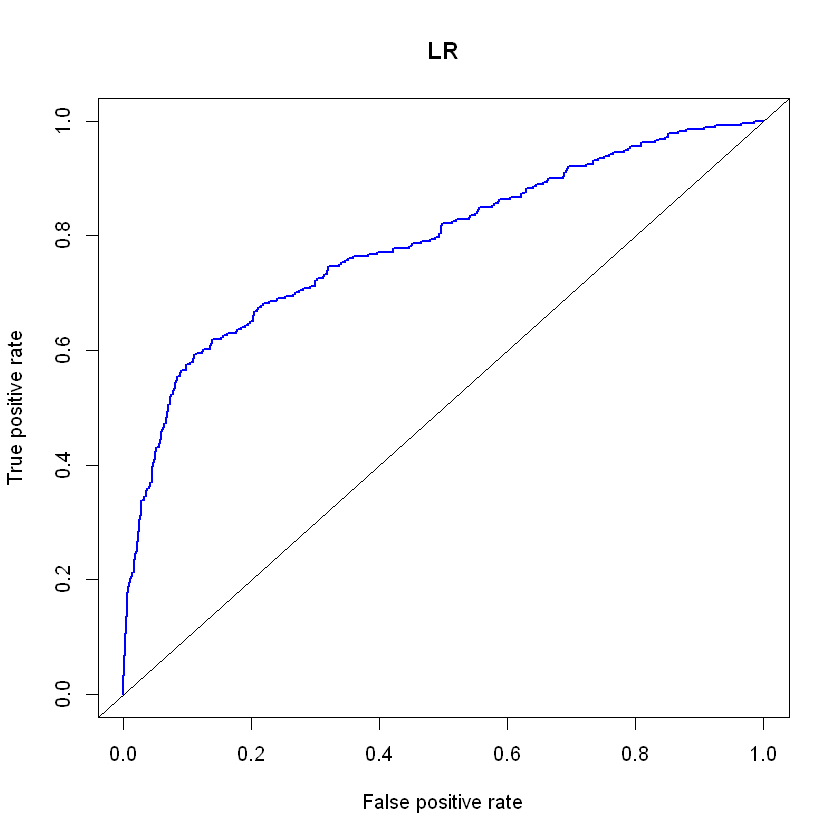

In [35]:
library("ROCR")
fit.LR.pred <-prediction( result.LR2, test[,20])
fit.LR.perf <- performance(fit.LR.pred,"tpr","fpr")
plot( fit.LR.perf,lwd=2,col="blue", main="LR")
abline(a=0,b=1)

In [36]:
auc.LR.tmp <- performance(fit.LR.pred, "auc")
auc.LR <- as.numeric(auc.LR.tmp@y.values)
auc.LR

[1] 0.787506

# Random Forest

In [16]:
head(train)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y.class
56,self-employed,married,university.degree,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
57,management,married,university.degree,no,no,no,cellular,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
36,admin.,married,university.degree,no,yes,no,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
45,management,married,high.school,unknown,no,no,cellular,aug,wed,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
39,admin.,single,university.degree,no,yes,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
33,services,married,high.school,no,no,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [4]:
library("randomForest")

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [17]:
rf <- randomForest(y.class~., data=train, type = 'classification', importance=TRUE)

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

In [18]:
print(rf)


Call:
 randomForest(formula = y.class ~ ., data = train, type = "classification",      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 0.08082805
                    % Var explained: 17.09


In [19]:
result.RF <- predict(rf, newdata=test, type="response")

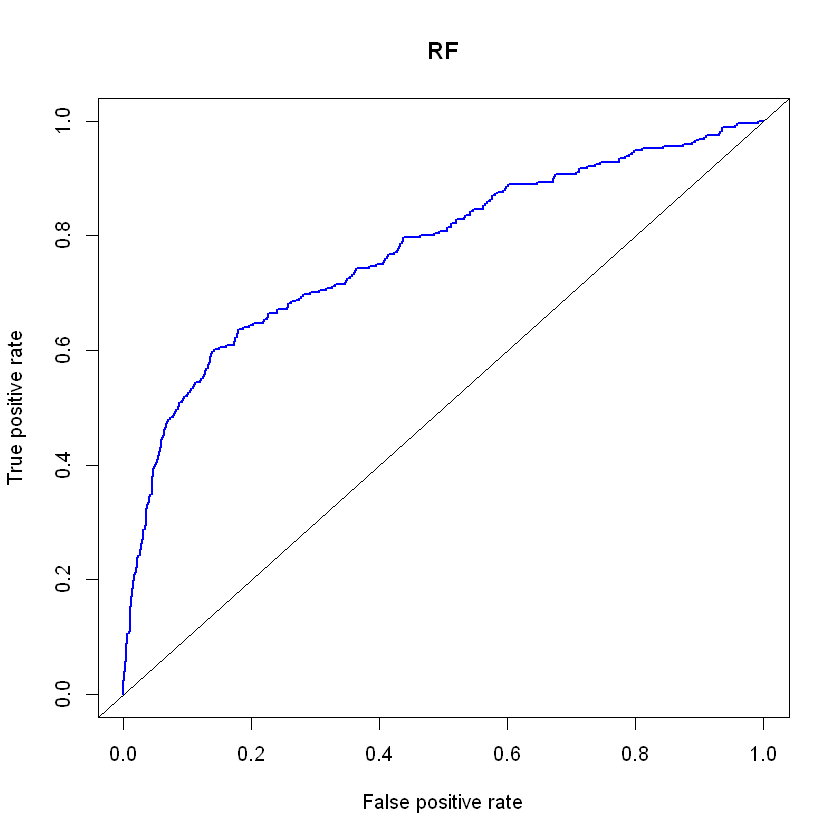

In [20]:
library("ROCR")
fit.RF.pred <-prediction( result.RF, test[,20])
fit.RF.perf <- performance(fit.RF.pred,"tpr","fpr")
plot( fit.RF.perf,lwd=2,col="blue", main="RF")
abline(a=0,b=1)

In [23]:
auc.RF.tmp <- performance(fit.RF.pred, "auc")
auc.RF <- as.numeric(auc.RF.tmp@y.values)
auc.RF

[1] 0.7752064

# SVM

In [1]:
library(e1071)
library(kernlab)

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [23]:
svmfit <- svm(y.class~., data = train, kernel = "polynomial", cost = 10)

In [24]:
result.SVM <- predict(svmfit, newdata=test, type="response")

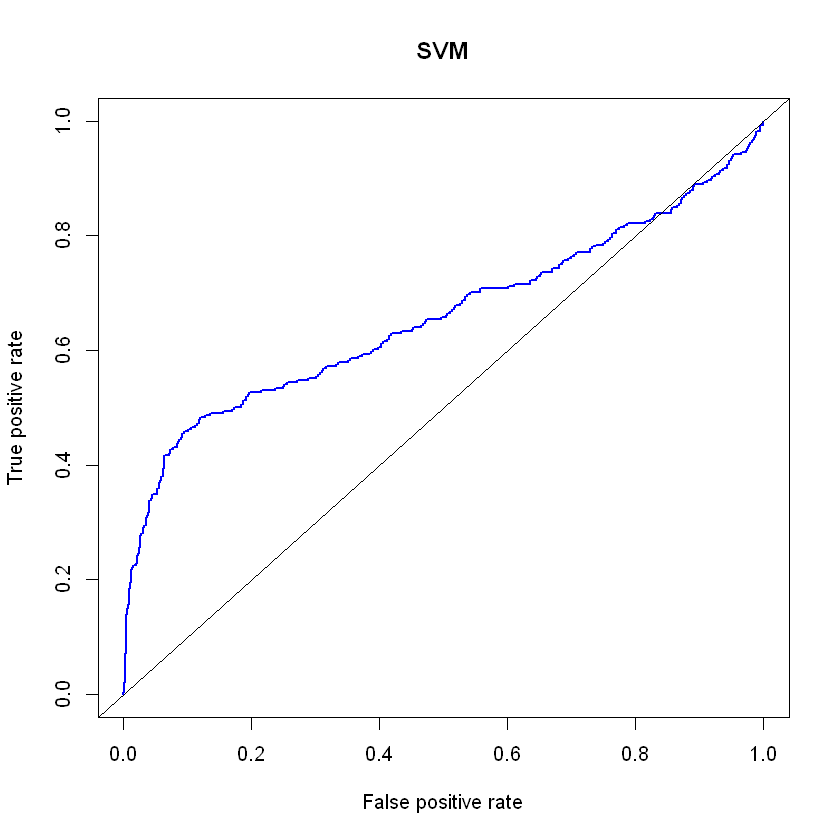

In [25]:
library("ROCR")
fit.SVM.pred <-prediction( result.SVM, test[,20])
fit.SVM.perf <- performance(fit.SVM.pred,"tpr","fpr")
plot( fit.SVM.perf,lwd=2,col="blue", main="SVM")
abline(a=0,b=1)

In [26]:
auc.SVM.tmp <- performance(fit.SVM.pred, "auc")
auc.SVM <- as.numeric(auc.SVM.tmp@y.values)
auc.SVM

[1] 0.6581833